# Electric Vehicle Analysis Project

## Introduction
- This project analyzes the dataset of BEVs and PHEVs registered in Washington State.

## Step 1: Data Loading
- Load the dataset and inspect its structure.

## Step 2: Data Cleaning
- Handle missing values and data inconsistencies.



In [44]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [45]:
# Explore the data
print(df.head())

     VIN_1_10     County          City State  Postal_Code  Model_Year  \
0  1C4JJXP66P     Kitsap       Poulsbo    WA      98370.0        2023   
1  1G1FX6S08K  Snohomish  Lake Stevens    WA      98258.0        2019   
2  WBY1Z2C58F       King       Seattle    WA      98116.0        2015   
3  5YJ3E1EBXK       King       Seattle    WA      98178.0        2019   
4  5YJSA1V24F     Yakima         Selah    WA      98942.0        2015   

        Make     Model                   Electric_Vehicle_Type  \
0       JEEP  WRANGLER  Plug-in Hybrid Electric Vehicle (PHEV)   
1  CHEVROLET   BOLT EV          Battery Electric Vehicle (BEV)   
2        BMW        I3          Battery Electric Vehicle (BEV)   
3      TESLA   MODEL 3          Battery Electric Vehicle (BEV)   
4      TESLA   MODEL S          Battery Electric Vehicle (BEV)   

  Clean_Alternative_Fuel_Vehicle_CAFV_Eligibility  Electric_Range  Base_MSRP  \
0           Not eligible due to low battery range            21.0        0.0   
1   

In [46]:
print(df.describe())

         Postal_Code     Model_Year  Electric_Range      Base_MSRP  \
count  223992.000000  223995.000000   223977.000000  223977.000000   
mean    98176.491165    2021.264408       47.736187     829.894386   
std      2544.240509       2.989676       84.987140    7372.509049   
min      1731.000000    1999.000000        0.000000       0.000000   
25%     98052.000000    2020.000000        0.000000       0.000000   
50%     98126.000000    2022.000000        0.000000       0.000000   
75%     98374.000000    2023.000000       39.000000       0.000000   
max     99577.000000    2025.000000      337.000000  845000.000000   

       Legislative_District  DOL_Vehicle_ID  Census_Tract  
count         223521.000000    2.239950e+05  2.239920e+05  
mean              28.876361    2.329328e+08  5.297997e+10  
std               14.911023    6.884329e+07  1.531491e+09  
min                1.000000    4.385000e+03  1.001020e+09  
25%               17.000000    2.008002e+08  5.303301e+10  
50%      

In [47]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223995 entries, 0 to 223994
Data columns (total 17 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   VIN_1_10                                         223995 non-null  object 
 1   County                                           223992 non-null  object 
 2   City                                             223992 non-null  object 
 3   State                                            223995 non-null  object 
 4   Postal_Code                                      223992 non-null  float64
 5   Model_Year                                       223995 non-null  int64  
 6   Make                                             223995 non-null  object 
 7   Model                                            223995 non-null  object 
 8   Electric_Vehicle_Type                            223995 non-null  object 
 9   Clean_Alternati

In [48]:
# Show the count of missing values for each column
print(df.isnull().sum())

VIN_1_10                                             0
County                                               3
City                                                 3
State                                                0
Postal_Code                                          3
Model_Year                                           0
Make                                                 0
Model                                                0
Electric_Vehicle_Type                                0
Clean_Alternative_Fuel_Vehicle_CAFV_Eligibility      0
Electric_Range                                      18
Base_MSRP                                           18
Legislative_District                               474
DOL_Vehicle_ID                                       0
Vehicle_Location                                    10
Electric_Utility                                     3
Census_Tract                                         3
dtype: int64


# Step 2: Data Cleaning

In [49]:
# Create a copy of the dataset, to make changes on the copy.
df2 = df.copy()

In [50]:
# Look at the numeric data, and search for abnormalities.
df2.describe()

,Postal_Code,Model_Year,Electric_Range,Base_MSRP,Legislative_District,DOL_Vehicle_ID,Census_Tract
count,223992.000000,223995.000000,223977.000000,223977.000000,223521.000000,2.239950e+05,2.239920e+05
mean,98176.491165,2021.264408,47.736187,829.894386,28.876361,2.329328e+08,5.297997e+10
std,2544.240509,2.989676,84.987140,7372.509049,14.911023,6.884329e+07,1.531491e+09
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.008002e+08,5.303301e+10
50%,98126.000000,2022.000000,0.000000,0.000000,32.000000,2.482992e+08,5.303303e+10
75%,98374.000000,2023.000000,39.000000,0.000000,42.000000,2.673973e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [51]:
# Observations from the data describtion:

# Model Year: Min value is 1999, possibly an outlier. Requires investigation.

# 2. Base MSRP: Over 75% of values are 0, offering limited insights. Consider dropping.

# 3. Electric Range: Over 50% of values are 0. Investigate if they represent valid data or should be dropped.


In [52]:
# Identify possibly outliers and values not relevant to the analysis in 'Model Year'.
unique_values = df2['Model_Year'].value_counts()
print(unique_values)

Model_Year
2023    59060
2024    45525
2022    28610
2021    20278
2018    14142
2020    12103
2019    10874
2017     8433
2016     5358
2025     5007
2015     4680
2013     4258
2014     3404
2012     1513
2011      692
2010       23
2008       23
2000        7
2002        2
1999        2
2003        1
Name: count, dtype: int64


In [53]:
# Drop rows where Model_Year is less than 2008
df2 = df2[df2['Model_Year'] >= 2008]

# Verify the result
print(df2['Model_Year'].min())  # Check the minimum value in Model_Year to ensure no values are under 2008

2008


In [54]:
# Drop the 'Base_MSRP' column as it provides limited insights
df2 = df2.drop(columns=['Base_MSRP'])

In [55]:
print(df2['Electric_Range'].describe())

count    223965.000000
mean         47.734999
std          84.989185
min           0.000000
25%           0.000000
50%           0.000000
75%          39.000000
max         337.000000
Name: Electric_Range, dtype: float64


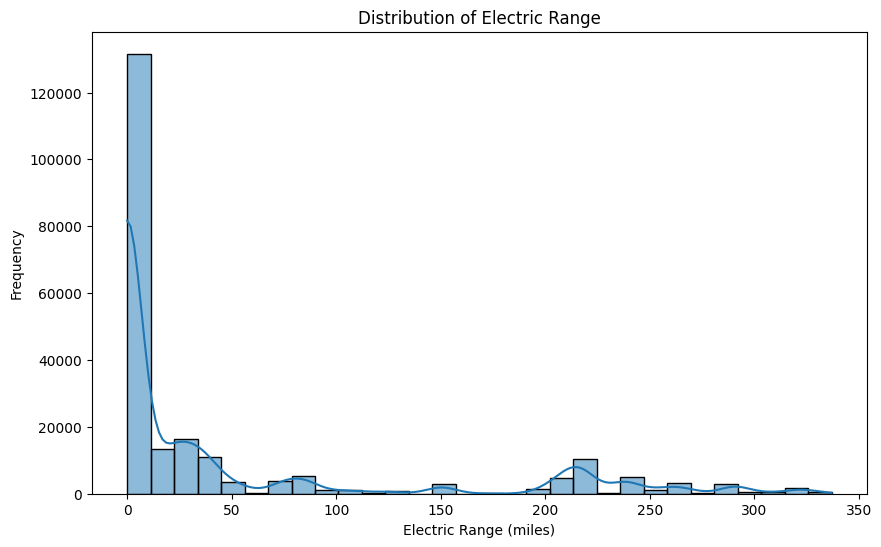

In [56]:
# Create a histogram to analyze the distribution of 'Electric_Range'.
plt.figure(figsize=(10, 6))
sns.histplot(df2['Electric_Range'], bins=30, kde=True)
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.show()

In [57]:
# As observed from the histogram, a significant portion of rows have a value of 0 in the `Electric_Range` column.
# This suggests that the column may not provide meaningful insights, so the best approach is to drop it.
df2 = df2.drop(columns=['Electric_Range'])

In [58]:
# Handel Missing Values
print(df2.isnull().sum())

VIN_1_10                                             0
County                                               3
City                                                 3
State                                                0
Postal_Code                                          3
Model_Year                                           0
Make                                                 0
Model                                                0
Electric_Vehicle_Type                                0
Clean_Alternative_Fuel_Vehicle_CAFV_Eligibility      0
Legislative_District                               474
DOL_Vehicle_ID                                       0
Vehicle_Location                                    10
Electric_Utility                                     3
Census_Tract                                         3
dtype: int64


In [59]:
# Drop rows with 5 or more missing values
# 'thresh' specifies the minimum number of non-NA values required to keep the row
df2 = df2.dropna(thresh=df.shape[1] - 5 + 1)
print(df2.isnull().sum())

VIN_1_10                                             0
County                                               0
City                                                 0
State                                                0
Postal_Code                                          0
Model_Year                                           0
Make                                                 0
Model                                                0
Electric_Vehicle_Type                                0
Clean_Alternative_Fuel_Vehicle_CAFV_Eligibility      0
Legislative_District                               471
DOL_Vehicle_ID                                       0
Vehicle_Location                                     7
Electric_Utility                                     0
Census_Tract                                         0
dtype: int64


In [60]:
# Replace missing 'Legislative_District' with -1
df2['Legislative_District'] = df2['Legislative_District'].fillna(-1)

# Verify that all missing values have been addressed
print(df2.isnull().sum())

VIN_1_10                                           0
County                                             0
City                                               0
State                                              0
Postal_Code                                        0
Model_Year                                         0
Make                                               0
Model                                              0
Electric_Vehicle_Type                              0
Clean_Alternative_Fuel_Vehicle_CAFV_Eligibility    0
Legislative_District                               0
DOL_Vehicle_ID                                     0
Vehicle_Location                                   7
Electric_Utility                                   0
Census_Tract                                       0
dtype: int64


In [61]:
# Replace missing Vehicle_Location with a placeholder
df2['Vehicle_Location'] = df2['Vehicle_Location'].fillna('POINT (Unknown Unknown)')

# Verify that there are no missing values
print(df2.isnull().sum())

VIN_1_10                                           0
County                                             0
City                                               0
State                                              0
Postal_Code                                        0
Model_Year                                         0
Make                                               0
Model                                              0
Electric_Vehicle_Type                              0
Clean_Alternative_Fuel_Vehicle_CAFV_Eligibility    0
Legislative_District                               0
DOL_Vehicle_ID                                     0
Vehicle_Location                                   0
Electric_Utility                                   0
Census_Tract                                       0
dtype: int64


In [62]:
# Check for duplicate rows
duplicate_rows = df2[df2.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

Number of duplicate rows: 0


In [63]:
df2['Vehicle_Location'].head()

,Vehicle_Location
0,POINT (-122.64681 47.73689)
1,POINT (-122.06402 48.01497)
2,POINT (-122.41067 47.57894)
3,POINT (-122.23825 47.49461)
4,POINT (-120.53145 46.65405)


In [64]:
# Define a function to parse longitude and latitude from the 'Vehicle_Location' column
def parse_point(point):
    try:
        # Remove the 'POINT (' and ')' parts, then split by space
        coords = point.strip('POINT ()').split()
        return float(coords[0]), float(coords[1])  # Return as (longitude, latitude)
    except:
        return 'Unknown', 'Unknown'  # Handle invalid or missing values

# Apply the parsing function
df2['Longitude'], df2['Latitude'] = zip(*df2['Vehicle_Location'].map(parse_point))

# Drop the original 'Vehicle_Location' column if no longer needed
df2 = df2.drop(columns=['Vehicle_Location'])

# Verify the result
print(df2[['Longitude', 'Latitude']].head())


   Longitude  Latitude
0 -122.64681  47.73689
1 -122.06402  48.01497
2 -122.41067  47.57894
3 -122.23825  47.49461
4 -120.53145  46.65405


In [65]:
# Convert 'Postal_Code' to string
df2['Postal_Code'] = df2['Postal_Code'].astype(str)

In [66]:
# Add a 'Country' column with the value 'United States' for all rows
df2['Country'] = 'United States'

In [67]:
df2['State'].value_counts()

,count
State,
WA,223509
CA,114
VA,59
MD,39
TX,30
NC,19
CO,17
FL,15
GA,15


In [68]:
# Keep only rows where the 'State' column is 'WA'
df2 = df2[df2['State'] == 'WA']
df2.head()

,VIN_1_10,County,City,State,Postal_Code,Model_Year,Make,Model,Electric_Vehicle_Type,Clean_Alternative_Fuel_Vehicle_CAFV_Eligibility,Legislative_District,DOL_Vehicle_ID,Electric_Utility,Census_Tract,Longitude,Latitude,Country
0,1C4JJXP66P,Kitsap,Poulsbo,WA,98370.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23.0,258127145,PUGET SOUND ENERGY INC,5.303509e+10,-122.64681,47.73689,United States
1,1G1FX6S08K,Snohomish,Lake Stevens,WA,98258.0,2019,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,44.0,4735426,PUGET SOUND ENERGY INC,5.306105e+10,-122.06402,48.01497,United States
2,WBY1Z2C58F,King,Seattle,WA,98116.0,2015,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,34.0,272697666,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,-122.41067,47.57894,United States
3,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,37.0,477309682,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,-122.23825,47.49461,United States
4,5YJSA1V24F,Yakima,Selah,WA,98942.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,15.0,258112970,PACIFICORP,5.307700e+10,-120.53145,46.65405,United States


In [69]:
# Replace 'WA' with 'Washington' in the 'State' column
df2['State'] = df2['State'].replace({'WA': 'Washington'})


<ipython-input-69-8cabe6a83b41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['State'] = df2['State'].replace({'WA': 'Washington'})


In [70]:
df2.head()

,VIN_1_10,County,City,State,Postal_Code,Model_Year,Make,Model,Electric_Vehicle_Type,Clean_Alternative_Fuel_Vehicle_CAFV_Eligibility,Legislative_District,DOL_Vehicle_ID,Electric_Utility,Census_Tract,Longitude,Latitude,Country
0,1C4JJXP66P,Kitsap,Poulsbo,Washington,98370.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23.0,258127145,PUGET SOUND ENERGY INC,5.303509e+10,-122.64681,47.73689,United States
1,1G1FX6S08K,Snohomish,Lake Stevens,Washington,98258.0,2019,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,44.0,4735426,PUGET SOUND ENERGY INC,5.306105e+10,-122.06402,48.01497,United States
2,WBY1Z2C58F,King,Seattle,Washington,98116.0,2015,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,34.0,272697666,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,-122.41067,47.57894,United States
3,5YJ3E1EBXK,King,Seattle,Washington,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,37.0,477309682,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,-122.23825,47.49461,United States
4,5YJSA1V24F,Yakima,Selah,Washington,98942.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,15.0,258112970,PACIFICORP,5.307700e+10,-120.53145,46.65405,United States


In [71]:
# Both columns are intended to represent a unique identifier for a vehicle.
unique_vin = df2['VIN_1_10'].nunique()
unique_dol = df2['DOL_Vehicle_ID'].nunique()

print(f"Number of unique values in VIN_1_10: {unique_vin}")
print(f"Number of unique values in DOL_Vehicle_ID: {unique_dol}")


Number of unique values in VIN_1_10: 13159
Number of unique values in DOL_Vehicle_ID: 223509


In [72]:
# The results show that VIN_1_10 contains repetitive values, making it unhelpful for the analysis.
# Therefore, we will drop this column.
df2 = df2.drop(columns=['VIN_1_10'])

In [73]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223509 entries, 0 to 223994
Data columns (total 16 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   County                                           223509 non-null  object 
 1   City                                             223509 non-null  object 
 2   State                                            223509 non-null  object 
 3   Postal_Code                                      223509 non-null  object 
 4   Model_Year                                       223509 non-null  int64  
 5   Make                                             223509 non-null  object 
 6   Model                                            223509 non-null  object 
 7   Electric_Vehicle_Type                            223509 non-null  object 
 8   Clean_Alternative_Fuel_Vehicle_CAFV_Eligibility  223509 non-null  object 
 9   Legislative_District

In [74]:
# Export the cleaned DataFrame to a CSV file
#df2.to_csv('Electric_Vehicle_Population_Cleaned.csv', index=False)

# Confirm the file is saved
#print("Data exported to 'Electric_Vehicle_Population_Cleaned.csv'")


In [75]:
# To download the Cleaned CSV file use this code:
# from google.colab import files
# files.download('Electric_Vehicle_Population_Cleaned.csv')